# Convolution of impulse response
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skoyamalab/teaching/blob/master/ir_conv.ipynb)

In [ ]:
# Download Aachen Impulse Response Database 
# URL: https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/aachen-impulse-response-database/
!wget -P Downloads https://www.iks.rwth-aachen.de/fileadmin/user_upload/downloads/forschung/tools-downloads/air_database_release_1_4.zip
!unzip Downloads/air_database_release_1_4.zip -d Downloads/

Archive:  Downloads/air_database_release_1_4.zip
   creating: Downloads//AIR_1_4
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_1_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_2_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_3_0_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_3_135_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_3_180_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_3_45_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_3_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_4_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_5_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_6_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_0_1_7_90_3.mat  
 extracting: Downloads//AIR_1_4/air_binaural_aula_carolina_1_1_1_90_3.mat  
 extra

In [7]:
# Download CMU_ARCTIC speech dataset
!wget -P Downloads http://festvox.org/cmu_arctic/cmu_arctic/cmu_us_bdl_arctic/wav/arctic_a0001.wav

--2025-11-07 16:16:32--  http://festvox.org/cmu_arctic/cmu_arctic/cmu_us_bdl_arctic/wav/arctic_a0001.wav
Resolving festvox.org (festvox.org)... 199.4.150.153
Connecting to festvox.org (festvox.org)|199.4.150.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103566 (101K) [audio/x-wav]
Saving to: ‘Downloads/arctic_a0001.wav’

arctic_a0001.wav    100%[===================>] 101.14K   295KB/s    in 0.3s    

2025-11-07 16:16:35 (295 KB/s) - ‘Downloads/arctic_a0001.wav’ saved [103566/103566]



In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy import io
import IPython.display

fs = 48000 # Sampling frequency

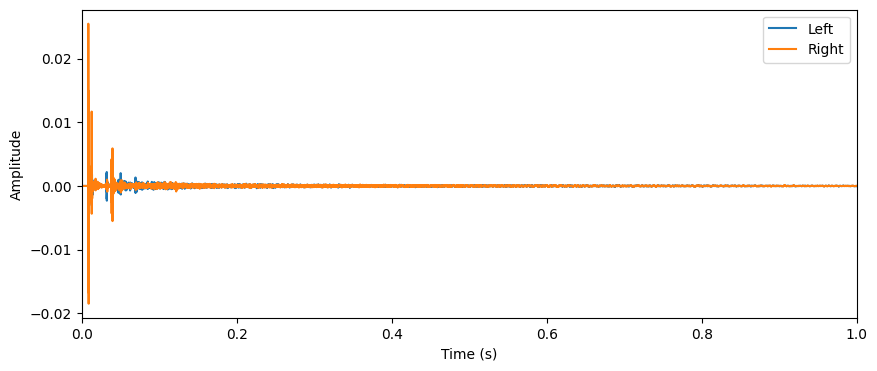

In [34]:
ir_r = io.loadmat('Downloads/AIR_1_4/air_binaural_aula_carolina_0_1_3_45_3.mat')['h_air'][0]
ir_l = io.loadmat('Downloads/AIR_1_4/air_binaural_aula_carolina_1_1_3_45_3.mat')['h_air'][0]

irlen = ir_r.shape[0]
time = np.arange(irlen) / fs

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time, ir_l, label='Left')
ax.plot(time, ir_r, label='Right')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_xlim(0, 1.0)
ax.legend()
plt.show()

IPython.display.Audio(np.array([ir_r, ir_l]), rate=fs)

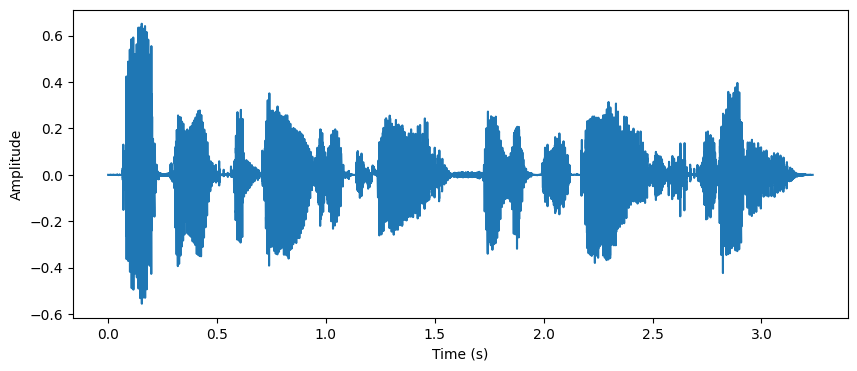

In [ ]:
fs_sig, sig = io.wavfile.read('Downloads/arctic_a0001.wav')
sig = sig / (2**(16-1))  # Normalize 16-bit PCM
siglen = sig.shape[0]

sig = signal.resample(sig, int(siglen * fs / fs_sig)) # Resampling
time = np.arange(sig.shape[0]) / fs

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time, sig)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
plt.show()

IPython.display.Audio(sig, rate=fs)

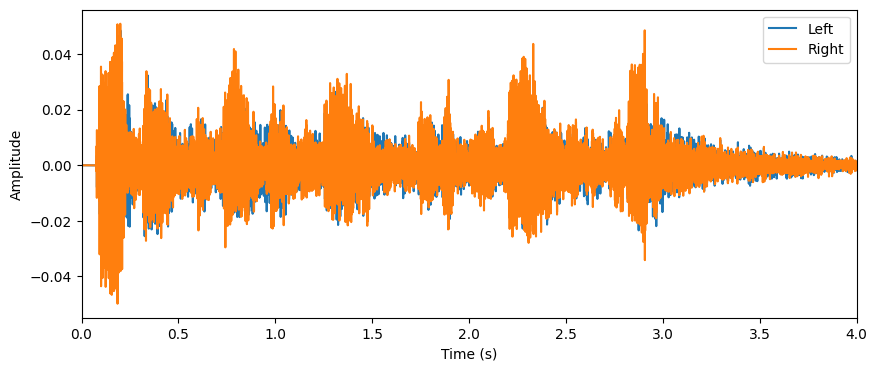

In [ ]:
# Convolution
sig_l = signal.convolve(sig, ir_l)
sig_r = signal.convolve(sig, ir_r)

siglen = sig_l.shape[0]
time = np.arange(siglen) / fs

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(time, sig_l, label='Left')
ax.plot(time, sig_r, label='Right')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_xlim(0, 4.0)
ax.legend()
plt.show()

IPython.display.Audio(np.array([sig_r, sig_l]), rate=fs)